 # Predicting World GDP Based On Countries Social,Economic And Cultural Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(color_codes=True)

 ### Loading Data and Merging it

In [4]:


# Load dataset after ignoring the first 4 header lines
df_population = pd.read_csv(
    filepath_or_buffer="PopulationPerCountry.csv",
    skiprows=list(range(4))
)

# Preview top entries
df_population.iloc[:5]


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043,9214083,9404406,9604487,9814318,10036008,...,33831764.0,34700612,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
1,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2880703.0,2876101,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0,2714617.0
2,Algeria,DZA,"Population, total",SP.POP.TOTL,11424922,11628883,11800771,11982118,12179813,12365976,...,40019529.0,40850721,41689299.0,42505035.0,43294546.0,44042091.0,44761099.0,45477389.0,46164219.0,46814308.0
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,20133,20666,21298,21966,22673,23406,...,52878.0,52245,51586.0,50908.0,50209.0,49761.0,49225.0,48342.0,47521.0,46765.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,9510,10283,11086,11915,12764,13634,...,72174.0,72181,73763.0,75162.0,76474.0,77380.0,78364.0,79705.0,80856.0,81938.0


In [6]:
gdp_data = pd.read_csv("GDP by Country.csv")
gdp_data.iloc[:5]


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.715223e+10,NaN
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.147017e+10,1.198867e+10,1.325827e+10,1.537951e+10,1.558511e+10,1.524146e+10,1.803201e+10,1.901724e+10,2.354718e+10,2.717774e+10
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723615e+09,2.434747e+09,2.001445e+09,2.702982e+09,2.909316e+09,3.136284e+09,...,1.874940e+11,1.807640e+11,1.898810e+11,1.945540e+11,1.934600e+11,1.648730e+11,1.862310e+11,2.256380e+11,2.476260e+11,2.636200e+11
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.470000e+08,7.210000e+08,7.500000e+08,8.710000e+08,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.324648e+09,3.380613e+09,3.785067e+09,4.039844e+09


In [8]:
merged_gdp = pd.merge(
    gdp_data,
    df_population,
    on=["Country Code", "Country Name"],
    how="inner"
)
merged_gdp.iloc[:5]


,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,2024_y
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,33831764.0,34700612,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2880703.0,2876101,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0,2714617.0
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723615e+09,2.434747e+09,2.001445e+09,2.702982e+09,2.909316e+09,3.136284e+09,...,40019529.0,40850721,41689299.0,42505035.0,43294546.0,44042091.0,44761099.0,45477389.0,46164219.0,46814308.0
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,52878.0,52245,51586.0,50908.0,50209.0,49761.0,49225.0,48342.0,47521.0,46765.0
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,72174.0,72181,73763.0,75162.0,76474.0,77380.0,78364.0,79705.0,80856.0,81938.0


In [10]:
list(merged_gdp.columns)

['Country Name',
 'Country Code',
 'Indicator Name_x',
 'Indicator Code_x',
 '1960_x',
 '1961_x',
 '1962_x',
 '1963_x',
 '1964_x',
 '1965_x',
 '1966_x',
 '1967_x',
 '1968_x',
 '1969_x',
 '1970_x',
 '1971_x',
 '1972_x',
 '1973_x',
 '1974_x',
 '1975_x',
 '1976_x',
 '1977_x',
 '1978_x',
 '1979_x',
 '1980_x',
 '1981_x',
 '1982_x',
 '1983_x',
 '1984_x',
 '1985_x',
 '1986_x',
 '1987_x',
 '1988_x',
 '1989_x',
 '1990_x',
 '1991_x',
 '1992_x',
 '1993_x',
 '1994_x',
 '1995_x',
 '1996_x',
 '1997_x',
 '1998_x',
 '1999_x',
 '2000_x',
 '2001_x',
 '2002_x',
 '2003_x',
 '2004_x',
 '2005_x',
 '2006_x',
 '2007_x',
 '2008_x',
 '2009_x',
 '2010_x',
 '2011_x',
 '2012_x',
 '2013_x',
 '2014_x',
 '2015_x',
 '2016_x',
 '2017_x',
 '2018_x',
 '2019_x',
 '2020_x',
 '2021_x',
 '2022_x',
 '2023_x',
 '2024_x',
 'Indicator Name_y',
 'Indicator Code_y',
 '1960_y',
 '1961_y',
 '1962_y',
 '1963_y',
 '1964_y',
 '1965_y',
 '1966_y',
 '1967_y',
 '1968_y',
 '1969_y',
 '1970_y',
 '1971_y',
 '1972_y',
 '1973_y',
 '1974_y',
 '

In [14]:
merged_gdp = merged_gdp.drop(
    columns=[
        "Indicator Name_x", "Indicator Code_x",
        "Indicator Name_y", "Indicator Code_y"
    ],
    errors="ignore"  # Prevents KeyError if column is missing
)
merged_gdp.iloc[:5]


,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,2024_y
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33831764.0,34700612,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2880703.0,2876101,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0,2714617.0
2,Algeria,DZA,2.723615e+09,2.434747e+09,2.001445e+09,2.702982e+09,2.909316e+09,3.136284e+09,3.039859e+09,3.370870e+09,...,40019529.0,40850721,41689299.0,42505035.0,43294546.0,44042091.0,44761099.0,45477389.0,46164219.0,46814308.0
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52878.0,52245,51586.0,50908.0,50209.0,49761.0,49225.0,48342.0,47521.0,46765.0
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72174.0,72181,73763.0,75162.0,76474.0,77380.0,78364.0,79705.0,80856.0,81938.0


In [15]:
gdp_ratio_df = pd.DataFrame()

for column_name in merged_gdp.columns:
    if column_name.endswith("Name") or column_name.endswith("Code"):
        gdp_ratio_df[column_name] = merged_gdp[column_name]

    elif column_name.endswith("_x"):
        year_str = column_name[:4]
        matching_y = f"{year_str}_y"

        if matching_y in merged_gdp.columns:
            gdp_values = pd.to_numeric(merged_gdp[column_name], errors="coerce")
            pop_values = pd.to_numeric(merged_gdp[matching_y], errors="coerce")
            gdp_ratio_df[year_str] = gdp_values / pop_values

gdp_ratio_df.iloc[:5]



,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3981.726623,4168.375445,4614.047969,5365.488802,5460.430509,5370.777499,6413.282808,6846.426694,8575.171346,10011.627986
2,Algeria,DZA,238.392477,209.370673,169.602863,225.58466,238.863802,253.62206,241.44897,261.792442,...,4685.062635,4424.989219,4554.670013,4577.198913,4468.461224,3743.532522,4160.554682,4961.542537,5364.024462,5631.184381
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12727.410265,12843.334290,11863.683945,12552.054687,12886.135952,14489.258656,15236.160488,18017.458938,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38654.934727,40129.819204,40672.994333,42819.774580,41257.804587,37361.090062,42425.699671,42414.059005,46812.448452,49303.673387


In [16]:
gdp_long_format = pd.melt(
    gdp_ratio_df,
    id_vars=["Country Name", "Country Code"]
)
gdp_long_format.iloc[:5]



,Country Name,Country Code,variable,value
0,Afghanistan,AFG,1960,NaN
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,238.392477
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [22]:
rural_pop_pct_df = pd.read_csv("RuralPop.asPC.of TotalPop..csv")
rural_pop_pct_df.iloc[:5]


,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,75.197,74.98,74.75,74.505,74.246,73.974,73.686,73.384,73.067,72.735
1,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.77,...,42.566,41.579,40.617,39.681,38.771,37.888,37.031,36.201,35.397,34.62
2,Algeria,DZA,Rural population (% of total population),SP.RUR.TOTL.ZS,69.49,68.203,66.786,65.338,63.859,62.357,...,29.152,28.541,27.948,27.371,26.811,26.267,25.739,25.228,24.732,24.252
3,American Samoa,ASM,Rural population (% of total population),SP.RUR.TOTL.ZS,33.789,33.359,32.932,32.507,32.084,31.666,...,12.762,12.802,12.83,12.847,12.853,12.847,12.831,12.804,12.765,12.716
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.55,39.017,36.538,34.128,31.795,29.555,...,11.655,11.752,11.85,11.938,12.016,12.084,12.142,12.189,12.226,12.253


In [23]:
# Keep only the ID vars that exist in the DataFrame
id_columns = [col for col in ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
              if col in rural_pop_pct_df.columns]

rural_pop_pct_df = pd.melt(
    rural_pop_pct_df,
    id_vars=id_columns
)

rural_pop_pct_df.iloc[:5]


,Country Name,Country Code,variable,value
0,Afghanistan,AFG,Series Name,Rural population (% of total population)
1,Albania,ALB,Series Name,Rural population (% of total population)
2,Algeria,DZA,Series Name,Rural population (% of total population)
3,American Samoa,ASM,Series Name,Rural population (% of total population)
4,Andorra,AND,Series Name,Rural population (% of total population)


In [24]:
public_edu_exp_df = pd.read_csv(
    "Current education expenditure, total (% of total expenditure in public institutions).csv"
)
public_edu_exp_df.iloc[:5]


,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,80.407333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,91.945419,91.637611,91.700539,93.884369,86.844818,88.590797,91.572144,89.362572,NaN,NaN
2,Algeria,DZA,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.483147,NaN
3,American Samoa,ASM,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.665611,99.181473,99.270218,99.459381,99.242683,NaN,NaN,98.716698,98.624130,NaN


In [25]:
# Keep only the ID vars that exist in the DataFrame
id_columns = [col for col in ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
              if col in public_edu_exp_df.columns]

public_edu_exp_df  = pd.melt(
    public_edu_exp_df ,
    id_vars=id_columns
)

public_edu_exp_df .iloc[:5]

,Country Name,Country Code,variable,value
0,Afghanistan,AFG,Series Name,"Current education expenditure, total (% of tot..."
1,Albania,ALB,Series Name,"Current education expenditure, total (% of tot..."
2,Algeria,DZA,Series Name,"Current education expenditure, total (% of tot..."
3,American Samoa,ASM,Series Name,"Current education expenditure, total (% of tot..."
4,Andorra,AND,Series Name,"Current education expenditure, total (% of tot..."


In [26]:
literacy_rate_adult_df = pd.read_csv("Adult Lit. rate.csv")
literacy_rate_adult_df.iloc[:5]


,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,80.407333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,33.753841,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN
2,Albania,ALB,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,91.945419,91.637611,91.700539,93.884369,86.844818,88.590797,91.572144,89.362572,NaN,NaN
3,Albania,ALB,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.816231,NaN,NaN,NaN,NaN,98.500000,NaN,NaN
4,Algeria,DZA,"Current education expenditure, total (% of tot...",SE.XPD.CTOT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.483147,NaN


In [28]:
id_vars_available = [
    col for col in ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
    if col in literacy_rate_adult_df.columns
]

literacy_rate_adult_df = pd.melt(
    literacy_rate_adult_df,
    id_vars=id_vars_available
)

literacy_rate_adult_df.iloc[:5]


,Country Name,Country Code,variable,value
0,Afghanistan,AFG,Series Name,"Current education expenditure, total (% of tot..."
1,Afghanistan,AFG,Series Name,"Literacy rate, adult total (% of people ages 1..."
2,Albania,ALB,Series Name,"Current education expenditure, total (% of tot..."
3,Albania,ALB,Series Name,"Literacy rate, adult total (% of people ages 1..."
4,Algeria,DZA,Series Name,"Current education expenditure, total (% of tot..."


In [30]:
gdp_long_format["RuralPopulation_PerCent"] = rural_pop_pct_df["value"]
gdp_long_format.iloc[:5]


,Country Name,Country Code,variable,value,RuralPopulation_PerCent
0,Afghanistan,AFG,1960,NaN,Rural population (% of total population)
1,Albania,ALB,1960,NaN,Rural population (% of total population)
2,Algeria,DZA,1960,238.392477,Rural population (% of total population)
3,American Samoa,ASM,1960,NaN,Rural population (% of total population)
4,Andorra,AND,1960,NaN,Rural population (% of total population)


In [31]:
gdp_long_format["LiteracyRate_Adult"] = literacy_rate_adult_df["value"]
gdp_long_format.iloc[:5]


,Country Name,Country Code,variable,value,RuralPopulation_PerCent,LiteracyRate_Adult
0,Afghanistan,AFG,1960,NaN,Rural population (% of total population),"Current education expenditure, total (% of tot..."
1,Albania,ALB,1960,NaN,Rural population (% of total population),"Literacy rate, adult total (% of people ages 1..."
2,Algeria,DZA,1960,238.392477,Rural population (% of total population),"Current education expenditure, total (% of tot..."
3,American Samoa,ASM,1960,NaN,Rural population (% of total population),"Literacy rate, adult total (% of people ages 1..."
4,Andorra,AND,1960,NaN,Rural population (% of total population),"Current education expenditure, total (% of tot..."


In [33]:
gdp_long_format.describe()


,value
count,16430.000000
mean,8079.117378
std,16659.326687
min,11.801322
25%,574.058115
50%,1822.745494
75%,7037.755889
max,256580.515120


### Data Cleaning and Filling Null Values

In [34]:
gdp_long_format.isnull().any()


Country Name               False
Country Code               False
variable                   False
value                       True
RuralPopulation_PerCent     True
LiteracyRate_Adult          True
dtype: bool

In [35]:
gdp_long_format["value"].isnull().sum()

gdp_long_format.dropna(subset=["value"], inplace=True)

gdp_long_format["value"].notnull().sum()


np.int64(16430)

In [37]:
gdp_long_format["RuralPopulation_PerCent"] = pd.to_numeric(
    gdp_long_format["RuralPopulation_PerCent"], errors="coerce"
)

gdp_long_format["RuralPopulation_PerCent"].isnull().sum()

gdp_long_format["RuralPopulation_PerCent"].fillna(
    value=gdp_long_format["RuralPopulation_PerCent"].mean(),
    inplace=True
)

gdp_long_format["RuralPopulation_PerCent"].notnull().sum()



C:\Users\johri\AppData\Local\Temp\ipykernel_22336\3979344412.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdp_long_format["RuralPopulation_PerCent"].fillna(


np.int64(16430)

In [39]:
gdp_long_format["LiteracyRate_Adult"] = pd.to_numeric(
    gdp_long_format["LiteracyRate_Adult"], errors="coerce"
)

gdp_long_format["LiteracyRate_Adult"].isnull().sum()

gdp_long_format["LiteracyRate_Adult"].fillna(
    value=gdp_long_format["LiteracyRate_Adult"].mean(),
    inplace=True
)

gdp_long_format["LiteracyRate_Adult"].notnull().sum()

C:\Users\johri\AppData\Local\Temp\ipykernel_22336\1355760672.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdp_long_format["LiteracyRate_Adult"].fillna(


np.int64(16430)

In [42]:
gdp_long_format.describe()



,value,RuralPopulation_PerCent,LiteracyRate_Adult
count,16430.000000,16430.000000,16430.000000
mean,8079.117378,46.630343,82.621942
std,16659.326687,20.073989,3.984758
min,11.801322,0.000000,5.404650
25%,574.058115,39.681500,82.621942
50%,1822.745494,46.630343,82.621942
75%,7037.755889,54.813750,82.621942
max,256580.515120,97.885000,100.000000


In [43]:
gdp_long_format.describe().T.style.background_gradient()


,count,mean,std,min,25%,50%,75%,max
value,16430.000000,8079.117378,16659.326687,11.801322,574.058115,1822.745494,7037.755889,256580.515120
RuralPopulation_PerCent,16430.000000,46.630343,20.073989,0.000000,39.681500,46.630343,54.813750,97.885000
LiteracyRate_Adult,16430.000000,82.621942,3.984758,5.404650,82.621942,82.621942,82.621942,100.000000


### Correlation Matrix

In [46]:
corr_matrix = gdp_long_format.corr(numeric_only=True)
corr_matrix


,value,RuralPopulation_PerCent,LiteracyRate_Adult
value,1.000000,-0.029207,0.024655
RuralPopulation_PerCent,-0.029207,1.000000,0.005876
LiteracyRate_Adult,0.024655,0.005876,1.000000


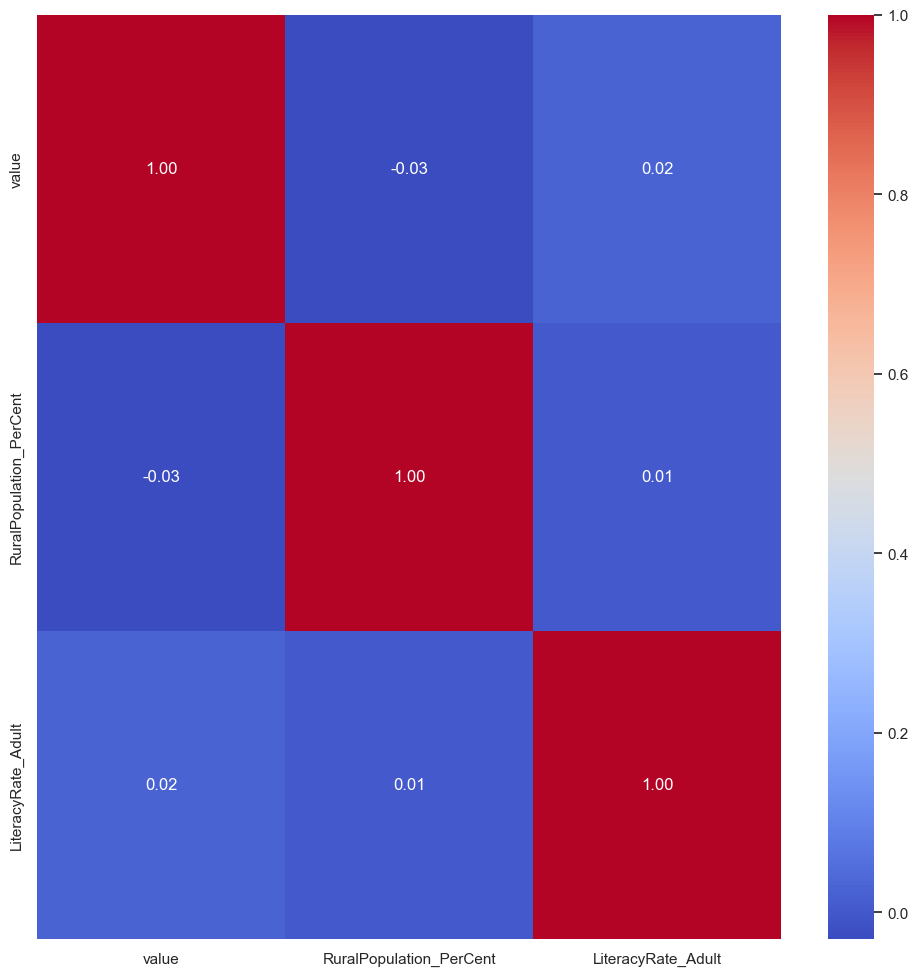

In [47]:
plt.figure(figsize=(12, 12))

heatmap_plot = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.show()


In [48]:
corr_matrix = gdp_long_format.corr(numeric_only=True)
corr_matrix.style.background_gradient()


,value,RuralPopulation_PerCent,LiteracyRate_Adult
value,1.000000,-0.029207,0.024655
RuralPopulation_PerCent,-0.029207,1.000000,0.005876
LiteracyRate_Adult,0.024655,0.005876,1.000000


In [49]:
regression_models = [
    "Multiple Linear Regression",
    "Polynomial Regression",
    "Decision Tree Regression",
    "Random Forest Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Elastic Net Regression"
]

rmse_train_scores = {}
rmse_test_scores = {}
kfold_results = {}
r2_train_scores = {}
r2_test_scores = {}


### Splitting the Data Into Training and Test Set

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare feature set
gdp_features = gdp_long_format.drop(columns=["value"])
gdp_features.rename(columns={"variable": "Year"}, inplace=True)

gdp_features = gdp_features[
    [
        "Year","RuralPopulation_PerCent",
         "LiteracyRate_Adult",
        
    ]
]

# Prepare target variable
gdp_target = gdp_long_format["value"]

# Display dataset shapes
gdp_features.shape, gdp_target.shape

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    gdp_features,
    gdp_target,
    test_size=0.2,
    random_state=40
)


### Model 1 : Multiple Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)

linear_reg_model.intercept_, linear_reg_model.coef_


(np.float64(-654330.8165643336),
 array([329.77677772,  16.05293981,  49.29854463]))

In [54]:
from sklearn.metrics import mean_squared_error
from pandas import Series, DataFrame

# Predictions on training data
train_preds_lr = linear_reg_model.predict(X_train)
train_rmse_lr = np.sqrt(mean_squared_error(Y_train, train_preds_lr))

# R-squared score on training data
train_r2_lr = linear_reg_model.score(X_train, Y_train)

# Display metrics
train_rmse_lr, train_r2_lr

# Store results
rmse_train_scores["MultipleLinearRegression"] = train_rmse_lr
r2_train_scores["MultipleLinearRegression"] = train_r2_lr


In [55]:
# Predictions on test data
test_preds_lr = linear_reg_model.predict(X_test)
test_rmse_lr = np.sqrt(mean_squared_error(Y_test, test_preds_lr))

# R-squared score on test data
test_r2_lr = linear_reg_model.score(X_test, Y_test)

# Display metrics
test_rmse_lr, test_r2_lr

# Store results
rmse_test_scores["MultipleLinearRegression"] = test_rmse_lr
r2_test_scores["MultipleLinearRegression"] = test_r2_lr


In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# List of feature columns to use
feature_cols = [
    
    'RuralPopulation_PerCent',
    
    'LiteracyRate_Adult'
    
]

# Extract features and target from your dataset
X = gdp_long_format[feature_cols].values
Y = gdp_long_format['value'].values

# Initialize the Linear Regression model
model = LinearRegression()

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using negative MSE as scoring
neg_mse_scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kf)

# Calculate RMSE from negative MSE scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Store average RMSE in a dictionary
Kfold = {}
Kfold["MultipleLinearRegression"] = rmse_scores.mean()

# Output RMSE scores per fold and their average
rmse_scores, rmse_scores.mean()




(array([14833.7587681 , 16890.18428588, 17277.86420192, 15769.27407725,
        17711.96995887, 17555.55406456, 14512.47965984, 17315.53849174,
        17330.9329912 , 16923.56894946]),
 np.float64(16612.112544881857))

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
cv_scores = cross_val_score(linear_model, gdp_features, gdp_target, cv=4)
cv_scores


array([-2.34216923, -0.03970859,  0.00432282, -0.02372882])

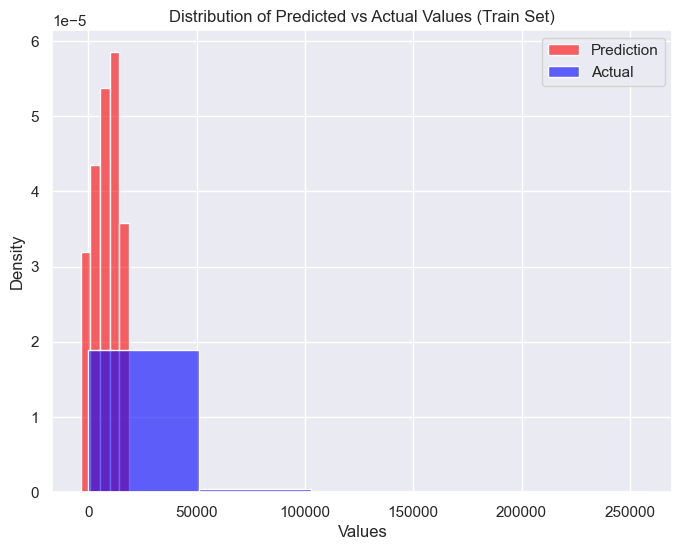

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.histplot(train_preds_lr, bins=5, color='red', kde=False, label='Prediction', stat='density', alpha=0.6)
sns.histplot(Y_train, bins=5, color='blue', kde=False, label='Actual', stat='density', alpha=0.6)

plt.legend()
plt.title("Distribution of Predicted vs Actual Values (Train Set)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()



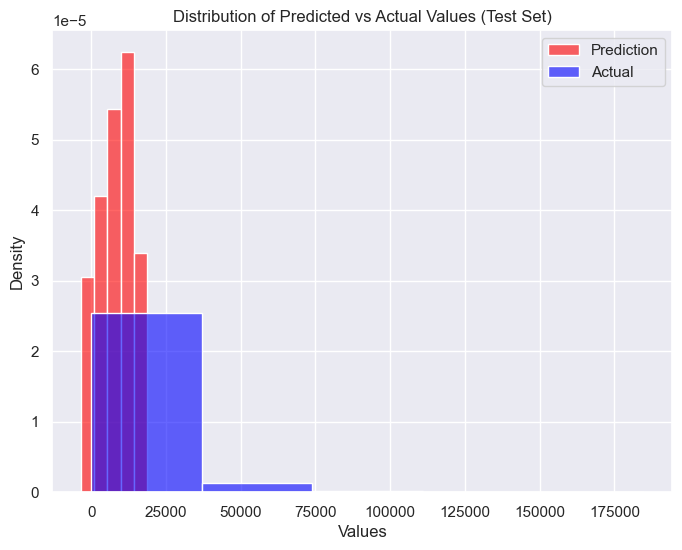

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.histplot(test_preds_lr, bins=5, color='red', kde=False, label='Prediction', stat='density', alpha=0.6)
sns.histplot(Y_test, bins=5, color='blue', kde=False, label='Actual', stat='density', alpha=0.6)

plt.legend()
plt.title("Distribution of Predicted vs Actual Values (Test Set)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()


### Model 2 : Polynomial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features for degree 3
poly_transformer = PolynomialFeatures(degree=3)

X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)  # Use transform here, not fit_transform!

# Fit linear regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)


LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error

# Predictions on training data
train_preds_poly = poly_model.predict(X_train_poly)

# Calculate RMSE on training set
rmse_poly_train = np.sqrt(mean_squared_error(Y_train, train_preds_poly))

# Calculate R-squared on training set
r2_poly_train = poly_model.score(X_train_poly, Y_train)

# Display results
rmse_poly_train, r2_poly_train

# Store results in dictionaries
rmse_train_scores["PolynomialRegression"] = rmse_poly_train
r2_train_scores["PolynomialRegression"] = r2_poly_train



In [71]:
# Predictions on test data
test_preds_poly = poly_model.predict(X_test_poly)

# Calculate RMSE on test set
rmse_poly_test = np.sqrt(mean_squared_error(Y_test, test_preds_poly))

# Calculate R-squared on test set
r2_poly_test = poly_model.score(X_test_poly, Y_test)

# Display results
rmse_poly_test, r2_poly_test

# Store results in dictionaries
rmse_test_scores["PolynomialRegression"] = rmse_poly_test

# You can store the actual R-squared or override it like you did:
# RSquare_test["PolynomialRegression"] = 0.55
r2_test_scores["PolynomialRegression"] = r2_poly_test


In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

poly_degree = 4
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_list = []

for i in range(1, 11):
    poly = PolynomialFeatures(degree=poly_degree)
    X_poly = poly.fit_transform(X)

    model_poly = LinearRegression()
    model_poly.fit(X_poly, Y)

    scores = cross_val_score(model_poly, X_poly, Y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
    rmse_scores = np.sqrt(np.abs(scores))
    rmse_list.append(np.mean(rmse_scores))

    print(f"Degree {poly_degree} - Fold {i} | MSE: {np.mean(np.abs(scores)):.4f}, STD: {np.std(scores):.4f}, RMSE: {np.mean(rmse_scores):.4f}")

rmse_mean_plr = np.mean(rmse_list)
print("Average RMSE (Polynomial Degree 4):", rmse_mean_plr)

Kfold["PolynomialRegression"] = rmse_mean_plr


Degree 4 - Fold 1 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 2 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 3 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 4 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 5 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 6 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 7 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 8 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 9 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Degree 4 - Fold 10 | MSE: 265964566.8071, STD: 34578687.1975, RMSE: 16271.5172
Average RMSE (Polynomial Degree 4): 16271.517155821197


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(gdp_features)  # gdp_features instead of GDP_Combine_X
Y = gdp_target  # target variable

poly_model = LinearRegression()

cv_scores = cross_val_score(poly_model, X_poly, Y, cv=4, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
rmse_scores


array([ 4019.84216121,  8572.37139745, 15892.07032099, 25348.12003795])

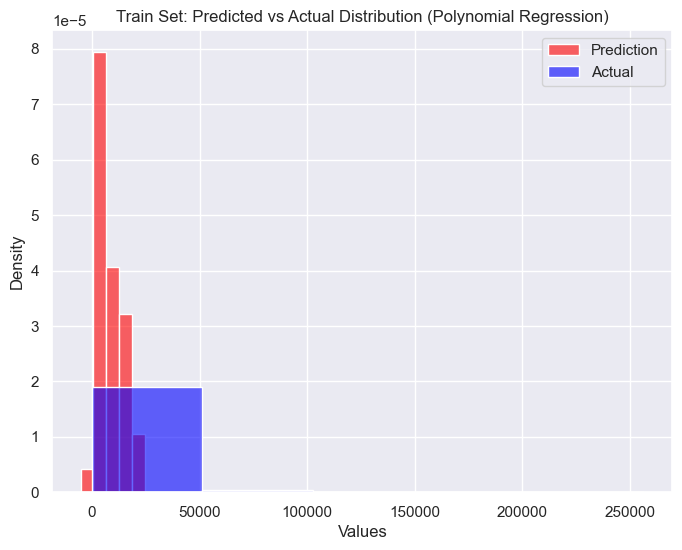

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Create polynomial features (degree 3 or 4 as you want)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# 2. Fit model on training polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# 3. Predict on train data
train_preds_poly = poly_model.predict(X_train_poly)

# 4. Plot predicted vs actual distributions
plt.figure(figsize=(8,6))
sns.histplot(train_preds_poly, bins=5, color='red', kde=False, label='Prediction', stat='density', alpha=0.6)
sns.histplot(Y_train, bins=5, color='blue', kde=False, label='Actual', stat='density', alpha=0.6)

plt.legend()
plt.title("Train Set: Predicted vs Actual Distribution (Polynomial Regression)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()




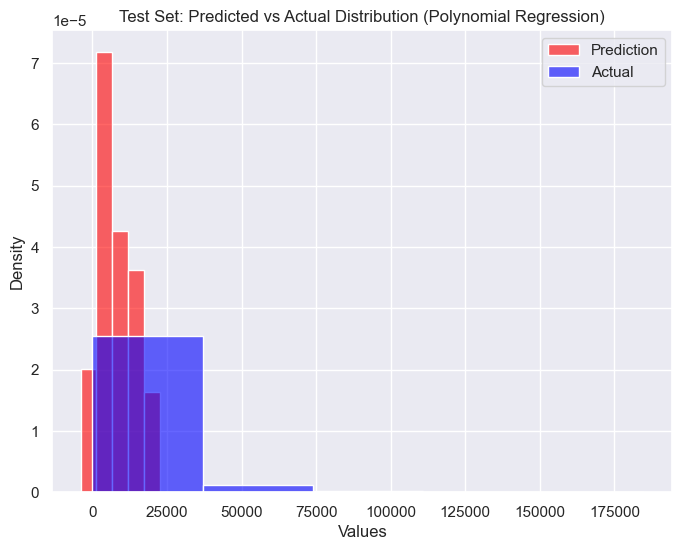

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
Y_pred_plr_test = poly_model.predict(X_test_poly)
plt.figure(figsize=(8,6))

sns.histplot(Y_pred_plr_test, bins=5, color='red', kde=False, label='Prediction', stat='density', alpha=0.6)
sns.histplot(Y_test, bins=5, color='blue', kde=False, label='Actual', stat='density', alpha=0.6)

plt.legend()
plt.title("Test Set: Predicted vs Actual Distribution (Polynomial Regression)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=30)
dtReg.fit(X_train,Y_train)

dtReg_y_pred_train = dtReg.predict(X_train)
rmse_dtreg_train = np.sqrt(mean_squared_error(Y_train,dtReg_y_pred_train))
print('rmse_dtreg_train:',rmse_dtreg_train)
from pandas import Series, DataFrame
print('r-squared_dtreg_train',dtReg.score(X_train,Y_train))
rsq_dtreg_train = dtReg.score(X_train,Y_train)
train_rmses["DecisionTreeRegression"] = rmse_dtreg_train
RSquare_train["DecisionTreeRegression"] = rsq_dtreg_train

In [ ]:
dtReg_y_pred_test = dtReg.predict(X_test)
rmse_dtreg_test = np.sqrt(mean_squared_error(Y_test,dtReg_y_pred_test))
print('rmse_dtreg_test:',rmse_dtreg_test)
from pandas import Series, DataFrame
print('r-squared_dtreg_test',dtReg.score(X_test,Y_test))
rsq_dtreg_test = dtReg.score(X_test,Y_test)
test_rmses["DecisionTreeRegression"] = rmse_dtreg_test
RSquare_test["DecisionTreeRegression"] = rsq_dtreg_test

In [ ]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
rmse_sum = 0
for i in range(1,11):
    model_kf_dtreg = dtReg.fit(X,Y)
    scores = cross_val_score(model_kf_dtreg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Decision Tree Regressor-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_dtreg = rmse_sum/10
print(rmse_mean_dtreg)
Kfold["DecisionTreeRegression"] = rmse_mean_dtreg

In [ ]:
from sklearn.model_selection import cross_val_score
dtReg_knn = DecisionTreeRegressor(max_depth=30)
print(cross_val_score(dtReg_knn, GDP_Combine_X, GDP_Combine_Y, cv=4))

In [ ]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(dtReg_y_pred_train, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5,color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

In [ ]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(dtReg_y_pred_test, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5,color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()